In [85]:
import sgt
import pandas as pd
from sgt import SGT
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# Loading data
corpus = pd.read_csv('protein_classification.csv')

In [87]:
details = {
    'id' : ['1', '2', '3', '4', '5'],
    
#     'sequence' : ['ABCD', 'BCD', 'ACD', 'ABCD', 'ZTY'],
    'sequence' : ['AA-BB-CC-DD', 'BB-CC-DD', 'AA-CC-DD', 'AA-BB-CC-DD', 'ZZ-TT-YY'],
}
  
# creating a Dataframe object 
corpus = pd.DataFrame(details)

# Data preprocessing
# corpus = corpus.loc[:,['Entry','Sequence']]
# corpus.columns = ['id', 'sequence']
# corpus['sequence'] = corpus['sequence'].map(list)

corpus['sequence'] = corpus['sequence'].apply(lambda x: x.split('-'))

corpus

,id,sequence
0,1,"[AA, BB, CC, DD]"
1,2,"[BB, CC, DD]"
2,3,"[AA, CC, DD]"
3,4,"[AA, BB, CC, DD]"
4,5,"[ZZ, TT, YY]"


In [88]:
pip install pandarallel

Note: you may need to restart the kernel to use updated packages.


In [89]:
%%time
# Compute SGT embeddings
sgt_ = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
sgtembedding_df = sgt_.fit_transform(corpus)

INFO: Pandarallel will run on 3 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.
CPU times: user 114 ms, sys: 85.3 ms, total: 199 ms
Wall time: 532 ms


In [90]:
# Set the id column as the dataframe index
sgtembedding_df = sgtembedding_df.set_index('id')
sgtembedding_df

,"(AA, AA)","(AA, BB)","(AA, CC)","(AA, DD)","(AA, TT)","(AA, YY)","(AA, ZZ)","(BB, AA)","(BB, BB)","(BB, CC)",...,"(YY, TT)","(YY, YY)","(YY, ZZ)","(ZZ, AA)","(ZZ, BB)","(ZZ, CC)","(ZZ, DD)","(ZZ, TT)","(ZZ, YY)","(ZZ, ZZ)"
id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.367879,0.135335,0.049787,0.0,0.0,0.0,0.0,0.0,0.367879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.367879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.367879,0.135335,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.367879,0.135335,0.049787,0.0,0.0,0.0,0.0,0.0,0.367879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.367879,0.135335,0.0


In [91]:
pca = PCA(n_components=2)
pca.fit(sgtembedding_df)

X=pca.transform(sgtembedding_df)

print(np.sum(pca.explained_variance_ratio_))
df = pd.DataFrame(data=X, columns=['x1', 'x2'])
df.head()

0.8871453193151423


,x1,x2
0,-0.264502,-0.105145
1,-0.104458,-0.052635
2,0.043604,0.395802
3,-0.264502,-0.105145
4,0.589858,-0.132877


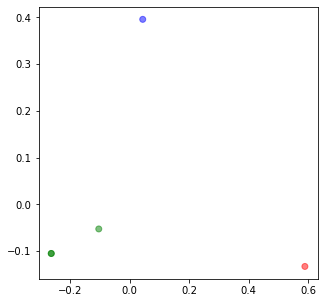

In [92]:
kmeans = KMeans(n_clusters=3, max_iter =300)
kmeans.fit(df)

labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize=(5, 5))
# colmap = {1: 'r', 2: 'g'}
colmap = {1: 'r', 2: 'g', 3: 'b'}
colors = list(map(lambda x: colmap[x+1], labels))
plt.scatter(df['x1'], df['x2'], color=colors, alpha=0.5, edgecolor=colors)

In [93]:
centroids

array([[ 0.58985777, -0.13287708],
       [-0.21115381, -0.08764169],
       [ 0.04360364,  0.39580216]])

In [94]:
kmeans.cluster_centers_

array([[ 0.58985777, -0.13287708],
       [-0.21115381, -0.08764169],
       [ 0.04360364,  0.39580216]])

In [95]:
df.shape

(5, 2)

In [96]:
labels

array([1, 1, 2, 1, 0], dtype=int32)